# Lyrics of Dutch Pop Artists Analysed with the Dutch Version of Linguistic Inquiry and Word Count (LIWC)
_Alie Lassche_

## 1. Introduction

Is today's popular music worse or better than the popular music of several years ago? Are the lyrics of contemporary pop songs happier or sadder than the lyrics of pop songs of previous generations? And do current songs talk about love more or less than they used to? These and more questions on pop song lyrics are being asked more and more, which defenitely has to do with the increasing availability of large data sets in electronic format. Carl Sharpe asks himself in an [article](https://towardsdatascience.com/49-years-of-lyrics-why-so-angry-1adf0a3fa2b4) on Towards Data Science: "I _know_ late 90s music was the best music of all time, but how could I prove/disprove that? How could I measure something so subjective?" In his article he presents the results of a Python based study of the change in language for popular music from 1970 to 2018. One of the hypotheses he tests is that lyrics have become more aggressive and profane over the past 49 years.

Furthermore, Peter Sheridan Dodds and Christopher M. Danforth state in their article 'Measuring the Happiness of Large-Scale Written Expression: Songs, Blogs, and Presidents' that they want to know how, when and why individuals feel as they do. Therefore they quantify happiness levels for a diverse set of large-scale texts, including song lyrics. One of their observations is that the happiness of song lyrics trends downward from the 1960s to the mid 1990s. In an article published a couple of weeks ago, Charlotte O. Brand et al. take a step further, stating: 'The quantitative description of trends [in language of lyrics] is fundamental, but a further necessary step is to understand what drives these trends.' (Brand et al. 2018: 1) In that context they use the theory of cultural evolution, with which researchers seek to explain population-level patterns and trends in cultural systems in terms of individual-level social, psychological and demographic processes. Cultural evolutionists have focused on transmission or learning biases as key drivers of cultural evolutionary dynamics. Brand et al. test the extent to which transmission biases can explain trends in the emotional content of two datasets of English language song lyrics. (2)

In all studies on the language of song lyrics that I have seen  (not only the ones mentions before, but also [this one](https://www.johnwmillr.com/trucks-and-beer/), [this](https://towardsdatascience.com/does-country-music-drink-more-than-other-genres-a21db901940b) and [this](https://github.com/Hugo-Nattagh/2017-Hip-Hop)), the corpus consists of English popsongs. As far as I know, no similar research has been done on a corpus containing lyrics of Dutch popular songs. Drawing inspiration from the studies on English language song lyrics mentioned above, I will research the lyrics of Dutch popular songs. Brand et al. use in their study on emotional expression in song lyrics the text analysis application Linguistic Inquiry and Word Count ([LIWC](http://liwc.wpengine.com)). LIWC is a software program to analyse text by counting words in 68 psychologically meaningful categories that are calculated in a dictionary of words. LIWC reads a given text and counts the number of words that fall in a certain category. Since it was originally developed by researchers with interest in social, clinical, health and cognitive psychology, the language categories were created to capture people's social and psychological states. LIWC is originally an English dictionary, but is translated in many languages, among which the Dutch language.

Investigating the change over time of emotional expression in lyrics is a time consuming study: you not only need a clean corpus of song lyrics, but also enough metadata on the songs such as the artist, the album and, most important, the year of release. Since my time and tools are limited, I had to choose a more straightforward approach. I decided to do a comparative study on works of Dutch pop song artists from the last thirty years, using LIWC. In this study I won't compare songs from different years or decades with each other, but I'll compare oeuvres from different artists with each other. The research question I will answer in this study is: _which textual differences in oeuvres of 80 Dutch pop song artists can be measured, using the Dutch version of LIWC?_ There have been some studies on the Dutch translation of LIWC, but the corpus always consisted of Dutch prose. (bron) Therefore I see this study also as a test case to see how succesful the Dutch translation of LIWC can be applied to Dutch song lyrics. In what follows I will first describe the methods I used in this study. Subsequently there will be a paragraph on the results. I will end with a discussion section with some suggestions and remarks for future work.

## 2. Methods

### 2.1 Data Preparation

#### _Corpus_
To create a dataset, I went to the Dutch equivalent of _Billboard_: the [Top40](https://www.top40.nl). Here the 'Top 100-Jaaroverzicht' can be found from 1965 until 2018. I checked each list from the last thirty years (1989-2018) manually for artists that wrote songs in Dutch. I created a list with the names of these artists. After that, drawing inspiration from fellow GitHub-people, I wrote a script which, given an artist from the above mentioned list, scraped corresponding song lyrics from [Genius](www.genius.com). I put the maximum amount of song lyrics per artist to 100. The lyrics were scraped in alphabetical order, which meant that for artists with more than 100 songs on [Genius](www.genius.com) only the songs which titles come first in an alphabetic ordered row, were scraped. As a result I got 93 .text-files, each file containing lyrics of a specific artist. This gave me a total amount of 4105 songs. If an artist couldn't be found on Genius, the script went looking for an artist with a similar name. In some cases this went wrong - Dutch rapper Dio was replaced with French singer Céline Dion, for example. I eliminated these kind of files with non-Dutch songs that were accidently scraped from the dataset. I also removed English songs from files of artists that wrote songs in both languages, as well as artists with only one song. The result was a dataset with 82 .text-files from 81 different artists. Since I removed English songs manually, I wasn't able to count the number of Dutch songs left, but my guess is that the remaining dataset contained between 3500 and 4000 songs.

#### _LIWC_
In this study I used the Dutch 2001 version of LIWC. As said before, LIWC counts the words in a given text that fall in one of the 68 categories that are specified in the LIWC dictionary and gives a percentage as output. Since not all categories were relevant for and applicable to song lyrics, I removed during the analysis 43 categories, such as 'Time', 'Space', 'Leisure', 'Certain', 'Motion', 'Sports', 'Eating', 'Job' et cetera. The categories that remained, 25 in total, were either a word type-category (e.g. 'Article', 'Preps', 'Pronoun'), an emotional category (e.g. 'Negemo', 'Posemo', 'Anger', 'Sad') or a category with a common topic (e.g. 'School', 'Friends', 'Family', 'Money'). 

### 2.2 Data Analysis

#### _LIWC reading lyrics_
Before the .txt-files were ready to be read by LIWC, the lyrics needed to be tokenized in order to let LIWC recognize words instead of seperate characters. I wrote a script that looped over the directory where all the .txt-files were stored. I used the `tokenize.word_tokenize` from the `nltk` library to tokenize the lyrics, since this tokenizer has a package for Dutch texts. I stored the words in a list and after removing punctuation I had a clean list of words for each .txt-file. This list of words I used as input for LIWC. The output of LIWC was a row with percentages for each category. I created a DataFrame from these rows. In the end this DataFrame contained 82 rows (corresponding with 82 artists) and 68 columns. After removing 43 columns as discussed earlier, a DataFrame with 82 rows and 25 columns remained. Each cell contained a number, expressing the percentage of words of some artist's work in a certain category.

I created separate DataFrames, grouping the different categories in the three groups mentioned earlier. I created a DataFrame `df1` with common topic-categories, containing the categories 'School', 'Friends', 'Home', 'Money', 'Family', 'Death', 'Relig' and 'Sexual'. `df2` contained emotional categories 'Optim', 'Posfeel', 'Negate', 'Negemo', 'Posemo', 'Anger', 'Sad' and 'Swear'. `df3` contained the word type-categories 'We', 'Other', 'You', 'Article', 'Othref', 'I', 'Self', 'Preps', and 'Pronouns'. I created an additional DataFrame `df4`, only containing the two categories 'Negemo' and 'Posemo'.

#### _Hypotheses_
By analyzing the emotional expression in song lyrics of songs spanning the years 1965-2015, Brand et al. found that the frequency of negative words increased over time, whilst the frequeny of positive words decreased over time. Drawing inspiration frow this observation, I expect that artists from the last decade use more negative words than artists that were (already) writing songs in the previous century. Furthermore I expect that the percentages of the word type-categories are lower for artists from the last decade compared to 'older' artists, since 'new' artists use lots of slang which will not be recognized by LIWC. I don't think there will be a substantial difference between 'old' and 'new' artists, regarding the frequencies in the categories which contain common topics.

In [2]:
import pandas as pd
df = pd.read_csv('../data/lyrics_liwc.csv', sep=';')
df.head()

,Unnamed: 0,Achieve,Affect,Anger,Anx,Article,Assent,Body,Cause,Certain,...,Social,Space,Sports,Swear,TV,Tentat,Time,Up,We,You
0,Lyrics_Jayh.txt,0.000584,0.031536,0.002920,0.000908,0.026604,0.006164,0.005840,0.004088,0.013432,...,0.101616,0.012978,0.000389,0.001687,0.000260,0.006684,0.033288,0.009344,0.002660,0.052755
1,Lyrics_Volumia!.txt,0.002373,0.049266,0.002147,0.001469,0.047458,0.001017,0.014011,0.006215,0.015819,...,0.090169,0.034011,0.000791,0.000565,0.000000,0.007910,0.068362,0.006328,0.004068,0.043842
2,Lyrics_JanSmit&Broederliefde.txt,0.000000,0.023333,0.003333,0.001667,0.021667,0.010000,0.003333,0.005000,0.016667,...,0.076667,0.020000,0.001667,0.001667,0.000000,0.001667,0.025000,0.011667,0.003333,0.053333
3,Lyrics_PauldeLeeuw.txt,0.001232,0.040833,0.002837,0.002165,0.048858,0.003359,0.009331,0.005263,0.016162,...,0.091109,0.023179,0.001008,0.000149,0.000149,0.014519,0.061138,0.008958,0.003397,0.043222
4,Lyrics_Yes-R.txt,0.002280,0.037201,0.006880,0.001960,0.046402,0.004080,0.006720,0.007920,0.012440,...,0.101684,0.017321,0.001200,0.003480,0.000240,0.011320,0.044642,0.009360,0.003840,0.051602


In [3]:
df.shape

(81, 69)

In [4]:
def get_names(filename):
    fields = filename.split('_')
    return fields[-1] if len(fields) > 1 else 'Unknown'

def get_names2(filename):
    fields = filename.split('.txt')
    return fields[0]

In [5]:
df['Unnamed: 0'] = df['Unnamed: 0'].apply(get_names)
df['Unnamed: 0'] = df['Unnamed: 0'].apply(get_names2)
df = df.rename(columns={'Unnamed: 0': 'Artist'})
df = df.set_index('Artist')

In [6]:
df.head()

,Achieve,Affect,Anger,Anx,Article,Assent,Body,Cause,Certain,Cogmech,...,Social,Space,Sports,Swear,TV,Tentat,Time,Up,We,You
Artist,,,,,,,,,,,,,,,,,,,,,
Jayh,0.000584,0.031536,0.002920,0.000908,0.026604,0.006164,0.005840,0.004088,0.013432,0.056778,...,0.101616,0.012978,0.000389,0.001687,0.000260,0.006684,0.033288,0.009344,0.002660,0.052755
Volumia!,0.002373,0.049266,0.002147,0.001469,0.047458,0.001017,0.014011,0.006215,0.015819,0.061695,...,0.090169,0.034011,0.000791,0.000565,0.000000,0.007910,0.068362,0.006328,0.004068,0.043842
JanSmit&Broederliefde,0.000000,0.023333,0.003333,0.001667,0.021667,0.010000,0.003333,0.005000,0.016667,0.041667,...,0.076667,0.020000,0.001667,0.001667,0.000000,0.001667,0.025000,0.011667,0.003333,0.053333
PauldeLeeuw,0.001232,0.040833,0.002837,0.002165,0.048858,0.003359,0.009331,0.005263,0.016162,0.060951,...,0.091109,0.023179,0.001008,0.000149,0.000149,0.014519,0.061138,0.008958,0.003397,0.043222
Yes-R,0.002280,0.037201,0.006880,0.001960,0.046402,0.004080,0.006720,0.007920,0.012440,0.064203,...,0.101684,0.017321,0.001200,0.003480,0.000240,0.011320,0.044642,0.009360,0.003840,0.051602


In [7]:
df.loc['Total']= df.median()

In [8]:
df = df.drop(columns=['Time', 'Space', 'Social', 'Humans', 'Discrep', 'Cause', 'Incl', 'Leisure', 'Hear', 'Affect', 'Comm', 'Tentat', 'Up', 'Motion', 'Feel', 'Certain', 'Insight'])

In [9]:
df = df.drop(columns=['Assent', 'Number', 'Occup', 'Inhib', 'Sports', 'Music', 'Nonfl', 'Achieve', 'Cogmech', 'Senses', 'Eating', 'Job', 'Excl', 'Present', 'Body', 'Physcal', 'Groom'])

In [10]:
df = df.drop(columns=['Future', 'Fillers', 'Metaph', 'Past', 'Down', 'See', 'Sleep', 'TV', 'Anx'])

In [11]:
print((df.loc['Total'].sort_values()))

Swear      0.000426
Death      0.000464
School     0.000722
Relig      0.001035
Friends    0.001472
Home       0.001710
Money      0.002328
Optim      0.002418
Sexual     0.002424
We         0.002602
Anger      0.002837
Family     0.003023
Posfeel    0.005834
Sad        0.006570
Other      0.009462
Negate     0.011208
Negemo     0.018678
Posemo     0.019038
You        0.039961
Article    0.045738
Othref     0.057721
I          0.071667
Self       0.075952
Preps      0.078978
Pronoun    0.143308
Name: Total, dtype: float64


In [12]:
df1 = df.drop(columns=['Optim', 'Posfeel', 'Negate', 'Negemo', 'Posemo', 'Anger', 'Sad', 'Swear', 'We', 'Other', 'You', 'Article', 'Othref', 'I', 'Self', 'Preps', 'Pronoun'])

In [13]:
df2 = df.drop(columns=['School', 'Friends', 'Home', 'Money', 'Family', 'Death', 'Relig', 'Sexual', 'We', 'Other', 'You', 'Article', 'Othref', 'I', 'Self', 'Preps', 'Pronoun'])

In [14]:
df3 = df.drop(columns=['School', 'Friends', 'Home', 'Money', 'Family', 'Death', 'Relig', 'Sexual', 'Optim', 'Posfeel', 'Negate', 'Negemo', 'Posemo', 'Anger', 'Sad', 'Swear'])

In [15]:
df4 = df2.drop(columns=['Optim', 'Posfeel', 'Negate', 'Anger', 'Sad', 'Swear'])

In [16]:
df1 = df1.drop('Total', axis=0)

In [17]:
df2 = df2.drop('Total', axis=0)

In [18]:
df3 = df3.drop('Total', axis=0)

In [19]:
df4 = df4.drop('Total', axis=0)

In [20]:
df = df.drop('Total', axis=0)

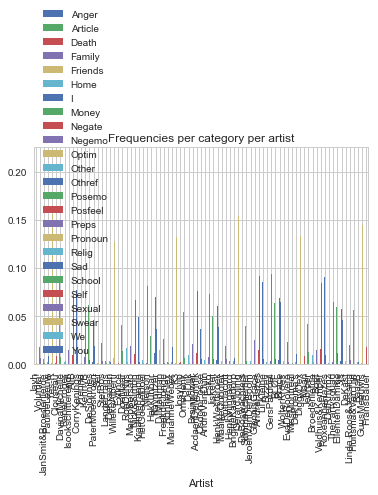

In [59]:
df.plot.bar(rot=90)
plt.title('Frequencies per category per artist')
plt.savefig('df.jpg', bbox_inches='tight', format='jpg', dpi=300)

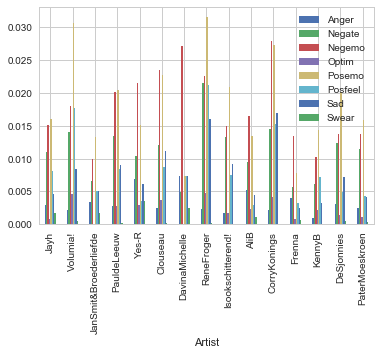

In [32]:
df2.iloc[0:15].plot(kind='bar', rot=90)

No handles with labels found to put in legend.


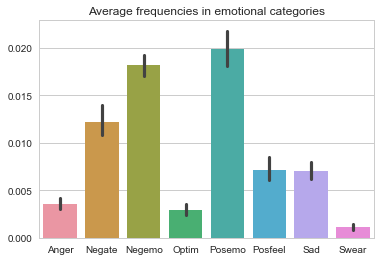

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")
ax = sns.barplot(data=df2)
plt.title('Average frequencies in emotional categories')
plt.savefig('df2.jpg', bbox_inches='tight', format='jpg', dpi=300)

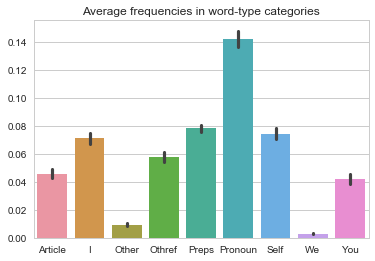

In [46]:
sns.set(style="whitegrid")
ax = sns.barplot(data=df3)
plt.title('Average frequencies in word-type categories')
plt.savefig('df3.jpg', bbox_inches='tight', format='jpg', dpi=300)

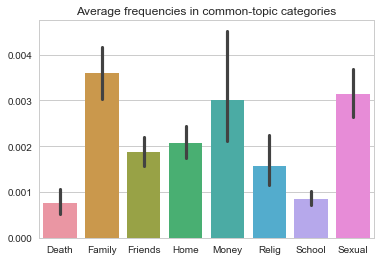

In [47]:
sns.set(style="whitegrid")
ax = sns.barplot(data=df1)
plt.title('Average frequencies in common-topic categories')
plt.savefig('df1.jpg', bbox_inches='tight', format='jpg', dpi=300)

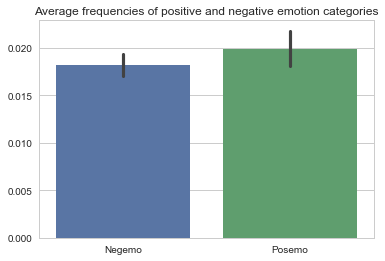

In [48]:
sns.set(style="whitegrid")
ax = sns.barplot(data=df4)
plt.title('Average frequencies of positive and negative emotion categories')
plt.savefig('df4.jpg', bbox_inches='tight', format='jpg', dpi=300)

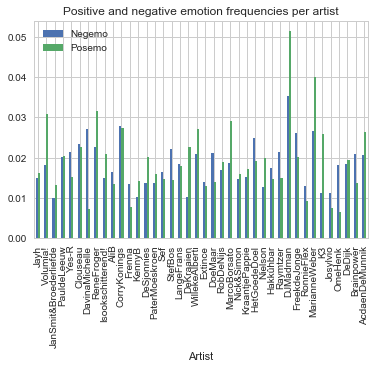

In [63]:
df4.iloc[0:40].plot(kind='bar', rot=90)
plt.title('Positive and negative emotion frequencies per artist')
plt.savefig('posneg.jpg', bbox_inches='tight', format='jpg', dpi=300)

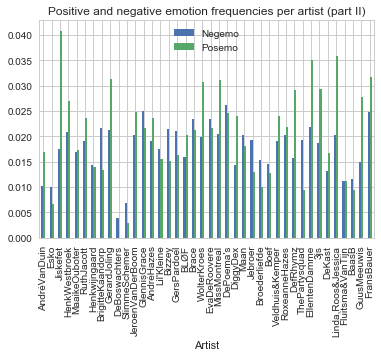

In [52]:
df4.iloc[41:81].plot(kind='bar', rot=90)
plt.title('Positive and negative emotion frequencies per artist (part II)')
plt.savefig('posneg2.jpg', bbox_inches='tight', format='jpg', dpi=300)

In [53]:
df4.to_csv('posneg.csv', sep=';')

In [54]:
df3.to_csv('wordtypes.csv', sep=';')

In [55]:
df2.to_csv('emotions.csv', sep=';')

In [60]:
df11 = df1.drop('Fluitsma&VanTijn', axis=0)

In [56]:
df1.to_csv('commoncategories.csv', sep=';')

In [57]:
df.to_csv('completedf.csv', sep=';')

In [61]:
df11.to_csv('df11.csv', sep=';')